1.用python写出一个数学竖式。

用键盘输入三个量：第一个数字、第二个数字、+或-号

输出：一个漂亮的数学竖式，如下图所示。

In [6]:
z = 0
a = int(input("请输入第一个整数："))
b = int(input("请输入第二个整数："))
m = input("请输入运算符（+ 或 -）：")

maxlen = max(len(str(a)),len(str(b)))
line = '-' * (maxlen+3)

if m == "+":
    z = a+b
elif m == '-':
    z = a-b
if m == '+' or m == '-':
    print("{:>{}}".format(a,maxlen+2))
    print(m,"{:>{}}".format(b,maxlen))
    print(line)
    print("{:>{}}".format(z,maxlen+2))
else:
    print ("输入运算符有误")

请输入第一个整数：121343512
请输入第二个整数：24135
请输入运算符（+ 或 -）：-
  121343512
-     24135
------------
  121319377


2.用python编写24点小游戏。

要求：从键盘输入4个数字，每个在1-10（包含）之间

判断是否可以用 +-\*/ 通过运算得到结果24，并输出运算过程

结果越简洁越好

In [6]:
import itertools

ops = '+-*/'
patterns = [
    "( %d %s %d ) %s ( %d %s %d )", # (a+b) * (c-d)
    "( ( %d %s %d ) %s %d ) %s %d", # ((a+b)*c) - d
    "( %d %s ( %d %s %d ) ) %s %d", # (a-(b-c)) * d
    "%d %s ( ( %d %s %d ) %s %d )", 
    "%d %s ( %d %s ( %d %s %d ) )"
    
    
]


def fun(cards):
    find = False
    for item in itertools.permutations(cards): 
        for p in patterns:
            ans = [p % (item[0],o1,item[1],o2,item[2],o3,item[3]) for o1 in ops for o2 in ops for o3 in ops]
            for a in ans:
                try:
                    if eval(a) == 24  :
                        print (a + " = 24\n")
                        find = True
                except ZeroDivisionError:
                    continue
    if find == False:
        print ('not find!')

cards = input("请输入4个数字（1到10之间，空格隔开）：")
fun([int(s) for s in cards.split()])


### 进一步提升，如何去重，参考：https://www.jianshu.com/p/716687780dd5

请输入4个数字（1到10之间，空格隔开）：2 4 5 6
( ( 2 + 4 ) * 5 ) - 6 = 24

( 2 * ( 4 + 5 ) ) + 6 = 24

( 2 * ( 5 + 4 ) ) + 6 = 24

( ( 4 + 2 ) * 5 ) - 6 = 24

4 - ( ( 2 - 6 ) * 5 ) = 24

( 4 * 5 ) - ( 2 - 6 ) = 24

( ( 4 + 5 ) * 2 ) + 6 = 24

( ( 4 * 5 ) - 2 ) + 6 = 24

4 - ( 5 * ( 2 - 6 ) ) = 24

( 4 * 5 ) + ( 6 - 2 ) = 24

( ( 4 * 5 ) + 6 ) - 2 = 24

4 + ( 5 * ( 6 - 2 ) ) = 24

4 + ( ( 6 - 2 ) * 5 ) = 24

( 5 * ( 2 + 4 ) ) - 6 = 24

( 5 * 4 ) - ( 2 - 6 ) = 24

( ( 5 + 4 ) * 2 ) + 6 = 24

( ( 5 * 4 ) - 2 ) + 6 = 24

( 5 * ( 4 + 2 ) ) - 6 = 24

( 5 * 4 ) + ( 6 - 2 ) = 24

( ( 5 * 4 ) + 6 ) - 2 = 24

( 5 * 6 ) - ( 2 + 4 ) = 24

( ( 5 * 6 ) - 2 ) - 4 = 24

( 5 * ( 6 - 2 ) ) + 4 = 24

( 5 * 6 ) - ( 4 + 2 ) = 24

( ( 5 * 6 ) - 4 ) - 2 = 24

( 6 - 2 ) + ( 4 * 5 ) = 24

6 + ( 2 * ( 4 + 5 ) ) = 24

6 - ( 2 - ( 4 * 5 ) ) = 24

( 6 - 2 ) + ( 5 * 4 ) = 24

( ( 6 - 2 ) * 5 ) + 4 = 24

6 + ( 2 * ( 5 + 4 ) ) = 24

6 - ( 2 - ( 5 * 4 ) ) = 24

( 6 + ( 4 * 5 ) ) - 2 = 24

6 + ( ( 4 + 5 ) * 2 ) = 24

6 + ( ( 4 * 5 ) - 2

3.对附件的英文小说: pride_and_prejudice.txt

统计出其中使用的单词数量，

并计算每一个单词的出现次数。

Report最多的10个单词。

In [20]:
prejudiceTxt = open('pride_and_prejudice.txt','r').read()
#replace punctuation
for i in "~!@#$%^&*()_+-=:<>?{}[]|\\/\'\'\",.":
        prejudiceTxt = prejudiceTxt.replace(i,' ')

Words = prejudiceTxt.split(' ')
wordcount = {}
for iword in Words:
    if not iword:
        continue
    #if iword not in wordcount:
    #    wordcount[iword] = 1
    #else:
    #    wordcount[iword] +=1
    wordcount[iword]=wordcount.get(iword,0)+1

worditerms = list(wordcount.items())
worditerms.sort(key=lambda x:x[1], reverse=True)
for i in range(10):
    word,count = worditerms[i]
    print('{0:<12}{1}'.format(word,count))

to          4109
the         4057
of          3592
and         3430
her         2101
I           2065
a           1911
was         1840
in          1792
that        1493


4.找出10000以内的所有孪生素数对。

In [3]:
from math import sqrt
count = 0

def findprimetwin(number):

    for i in range(2, number + 1):
        if isprime(i):
            if isprime(i + 2):
                print((i, i + 2))
                global count
                count += 1
            i += 2

def isprime(num):

    flag = True
    for i in range(2, int(sqrt(num)) + 1):
        if num % i == 0:
            flag = False
    return flag

print('10000以内共有孪生素数对具体如下：')
findprimetwin(10000)
print('共有',count,'对')

10000以内共有孪生素数对具体如下：
(3, 5)
(5, 7)
(11, 13)
(17, 19)
(29, 31)
(41, 43)
(59, 61)
(71, 73)
(101, 103)
(107, 109)
(137, 139)
(149, 151)
(179, 181)
(191, 193)
(197, 199)
(227, 229)
(239, 241)
(269, 271)
(281, 283)
(311, 313)
(347, 349)
(419, 421)
(431, 433)
(461, 463)
(521, 523)
(569, 571)
(599, 601)
(617, 619)
(641, 643)
(659, 661)
(809, 811)
(821, 823)
(827, 829)
(857, 859)
(881, 883)
(1019, 1021)
(1031, 1033)
(1049, 1051)
(1061, 1063)
(1091, 1093)
(1151, 1153)
(1229, 1231)
(1277, 1279)
(1289, 1291)
(1301, 1303)
(1319, 1321)
(1427, 1429)
(1451, 1453)
(1481, 1483)
(1487, 1489)
(1607, 1609)
(1619, 1621)
(1667, 1669)
(1697, 1699)
(1721, 1723)
(1787, 1789)
(1871, 1873)
(1877, 1879)
(1931, 1933)
(1949, 1951)
(1997, 1999)
(2027, 2029)
(2081, 2083)
(2087, 2089)
(2111, 2113)
(2129, 2131)
(2141, 2143)
(2237, 2239)
(2267, 2269)
(2309, 2311)
(2339, 2341)
(2381, 2383)
(2549, 2551)
(2591, 2593)
(2657, 2659)
(2687, 2689)
(2711, 2713)
(2729, 2731)
(2789, 2791)
(2801, 2803)
(2969, 2971)
(2999, 3001)
(311

5.针对附件的曲线数据(sample.txt)，画出曲线图。

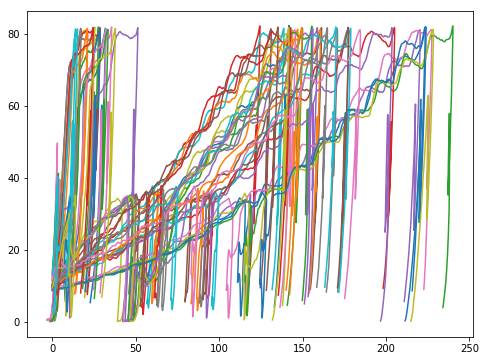

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import struct

lines = []
with open('sample.txt', 'r', encoding='utf-8') as csvf:  #需用utf-8编码
    k = 0
    for line in csv.reader(csvf):
        k = k + 1
        lines.append(line[0].split('\t'))

for i in range(int(len(lines)/2)):  #画出所有的图
    plt.rcParams['figure.figsize'] = (8.0, 6.0)
    codes1 = lines[2*i][5]
    codes2 = lines[2*i+1][5]
    x = []
    y = []
    for j in range(int((len(codes1)-2)/8)):
        hexcode1 = codes1[8*j+2:8*j+10]
        bts1 = bytes.fromhex(hexcode1)
        a = struct.unpack('<f',bts1)[0]
        x.append(a)
        hexcode2 = codes2[8*j+2:8*j+10]
        bts2 = bytes.fromhex(hexcode2)
        b = struct.unpack('<f',bts2)[0]
        y.append(b)
    plt.plot(x,y)
plt.show()